In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('iris - iris.csv')

In [102]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [104]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [105]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [106]:
df.duplicated().sum()

3

In [107]:
df.drop_duplicates(inplace=True)

In [108]:
X = df.drop('species', axis=1)
y = df['species']

In [109]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [110]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Convert string labels to numerical labels using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Fit and transform on training data
y_test = le.transform(y_test)       # Transform test data using the fitted encoder

y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [112]:
# Define the neural network model
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 3)  # 3 output classes for multiclass

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # no activation here because CrossEntropyLoss includes softmax
        return x

In [113]:
# Initialize the model, loss function, and optimizer
model = IrisNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [114]:
# Training loop
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/10000], Loss: 0.9544
Epoch [20/10000], Loss: 0.7932
Epoch [30/10000], Loss: 0.6561
Epoch [40/10000], Loss: 0.5448
Epoch [50/10000], Loss: 0.4558
Epoch [60/10000], Loss: 0.3846
Epoch [70/10000], Loss: 0.3250
Epoch [80/10000], Loss: 0.2741
Epoch [90/10000], Loss: 0.2295
Epoch [100/10000], Loss: 0.1901
Epoch [110/10000], Loss: 0.1567
Epoch [120/10000], Loss: 0.1294
Epoch [130/10000], Loss: 0.1075
Epoch [140/10000], Loss: 0.0907
Epoch [150/10000], Loss: 0.0777
Epoch [160/10000], Loss: 0.0680
Epoch [170/10000], Loss: 0.0605
Epoch [180/10000], Loss: 0.0545
Epoch [190/10000], Loss: 0.0496
Epoch [200/10000], Loss: 0.0454
Epoch [210/10000], Loss: 0.0419
Epoch [220/10000], Loss: 0.0389
Epoch [230/10000], Loss: 0.0362
Epoch [240/10000], Loss: 0.0339
Epoch [250/10000], Loss: 0.0318
Epoch [260/10000], Loss: 0.0299
Epoch [270/10000], Loss: 0.0282
Epoch [280/10000], Loss: 0.0267
Epoch [290/10000], Loss: 0.0253
Epoch [300/10000], Loss: 0.0240
Epoch [310/10000], Loss: 0.0228
Epoch [320/10000]

Accuracy: 96.67%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]
ROC-AUC (One-vs-Rest): 0.98


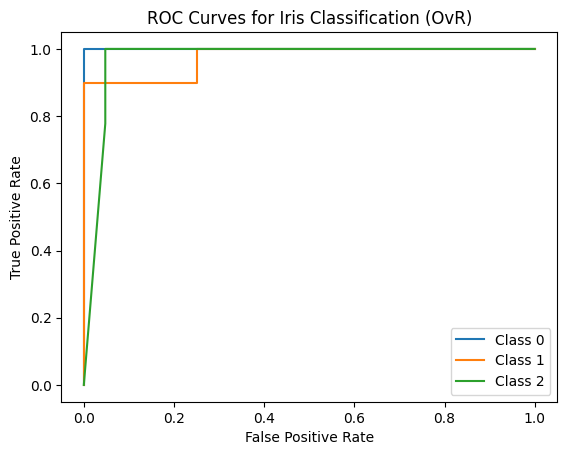

In [115]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    _, y_pred_classes = torch.max(y_pred, 1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy*100:.2f}%")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Calculate ROC AUC for each class (One-vs-Rest)
y_test_np = y_test.numpy()
y_pred_np = torch.softmax(y_pred, dim=1).numpy()

roc_auc_ovr = roc_auc_score(y_test_np, y_pred_np, multi_class='ovr')
print(f"ROC-AUC (One-vs-Rest): {roc_auc_ovr:.2f}")

# ROC curve for each class
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_np == i, y_pred_np[:, i])
    plt.plot(fpr, tpr, label=f"Class {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Iris Classification (OvR)")
plt.legend()
plt.show()